# Photoperiod

The photoperiod (i.e. daylight hours) is a variable highly related to plant development, particularly regulating the transition between vegetative and reproductive stages, a transition that is typically characterized by flowering. This is an evolutionary adaptation to ensure that seed production occurs during the right environmental conditions to increase the survival rate and ensure the perpetuation of the specie.

The length of light period required to induce flowering depends on plant species. Some plants like barley and wheat are induced to flowering when days are becoming longer (known as long-day plants), while some plants like cotton, rice, and chrysanthemums change stages when days are becoming shorter (known as short-day plants).

>While initially researchers thought it was the number of daylight hours that influenced the physiological and morphological changes in plants, it was later discovered that it is actually the length of dark hours that regulates plant development. So, short-day plants are actually long-night plants, and viceversa.

Photoperiodism also affects animals byaffecting migration patterns, triggering the entry into hibernation, and conditioning sexual behaviour. 

Because of its tilted angle and the consistent orbit of the Earth around the sun, the theoretical photoperiod can be accurately estimated based on the day of the year and latitude. Of course, the effective photoperiod observed at the Earth's surface may change depending on sky conditions.

The goal of this challenge is to write a Python script to compute the number of daylight hours for a **user-specified** date and latitude.


You can learn more about photoperiodism at:

<iframe src="https://www.wikiwand.com/en/Photoperiodism"></iframe>


In [36]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


In [37]:
# Define function
def photoperiod(phi,doy,verbose=False):
    
    phi = np.radians(phi) # Convert to radians
    light_intensity = 2.206 * 10**-3

    C = np.sin(np.radians(23.44)) # sin of the obliquity of 23.44 degrees.
    B = -4.76 - 1.03 * np.log(light_intensity) # Eq. [5]. Angle of the sun below the horizon. Civil twilight is -4.76 degrees.

    # Calculations
    alpha = np.radians(90 + B) # Eq. [6]. Value at sunrise and sunset.
    M = 0.9856*doy - 3.251 # Eq. [4].
    lmd = M + 1.916*np.sin(np.radians(M)) + 0.020*np.sin(np.radians(2*M)) + 282.565 # Eq. [3]. Lambda
    delta = np.arcsin(C*np.sin(np.radians(lmd))) # Eq. [2].

    # Defining sec(x) = 1/cos(x)
    P = 2/15 * np.degrees( np.arccos( np.cos(alpha) * (1/np.cos(phi)) * (1/np.cos(delta)) - np.tan(phi) * np.tan(delta) ) ) # Eq. [1].

    # Print results in order for each computation to match example in paper
    if verbose:
        print('Input latitude =', np.degrees(phi))
        print('[Eq 5] B =', B)
        print('[Eq 6] alpha =', np.degrees(alpha))
        print('[Eq 4] M =', M[0])
        print('[Eq 3] Lambda =', lmd[0])
        print('[Eq 2] delta=', np.degrees(delta[0]))
        print('[Eq 1] Daylength =', P[0])
    
    return P


In [38]:
# Invoke function with scalars
phi = 33.4;  # Latitude for consistency with notation in literature.
doy = np.array([201]); # Day of the year. Julian calendar. Day from January 1.

P = photoperiod(phi,doy,verbose=True)
print('Photoperiod: ' + str(np.round(P[0],2)) + ' hours/day')


Input latitude = 33.4
[Eq 5] B = 1.5400715888953513
[Eq 6] alpha = 91.54007158889536
[Eq 4] M = 194.8546
[Eq 3] Lambda = 476.93831283687416
[Eq 2] delta= 20.770548026002125
[Eq 1] Daylength = 14.203998218048154
Photoperiod: 14.2 hours/day


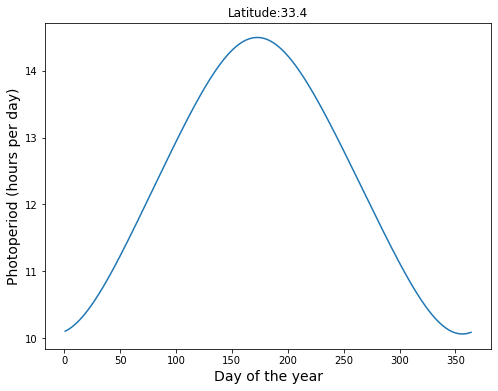

In [39]:
# Multiple inputs call
phi = 33.4;
doy = np.arange(1,365);
P = photoperiod(phi,doy)

plt.figure(figsize=(8,6))
plt.plot(doy,P)
plt.title('Latitude:' + str(phi))
plt.xlabel('Day of the year', size=14)
plt.ylabel('Photoperiod (hours per day)', size=14)
plt.show()


## References

Keisling, T.C., 1982. Calculation of the Length of Day 1. Agronomy Journal, 74(4), pp.758-759.